In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [4]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    


In [2]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [3]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

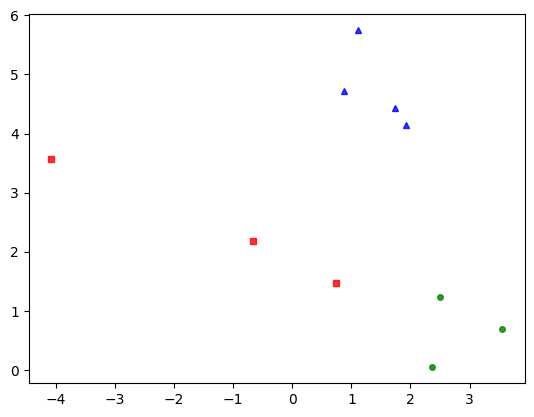

In [10]:
# 2
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2,
               random_state=0)

kmeans_display(X, y)


In [12]:
kmeans(X, K=3)

([array([[0.74285061, 1.46351659],
         [1.7373078 , 4.42546234],
         [3.54934659, 0.6925054 ]]),
  array([[-1.33317034,  2.40357823],
         [ 1.41425779,  4.76258478],
         [ 2.80560419,  0.65580377]]),
  array([[-2.37118082,  2.87360905],
         [ 1.41425779,  4.76258478],
         [ 2.2899158 ,  0.85773197]])],
 [array([1, 1, 2, 1, 0, 0, 0, 2, 2, 1], dtype=int64),
  array([1, 1, 2, 1, 0, 2, 0, 2, 2, 1], dtype=int64),
  array([1, 1, 2, 1, 0, 2, 0, 2, 2, 1], dtype=int64)],
 2)

In [6]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

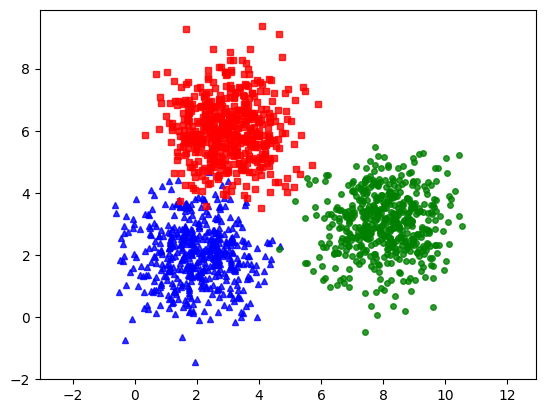

In [7]:
kmeans_display(X, original_label)

In [13]:
kmeans(X, K)

([array([[ 1.9263585 ,  4.15243012],
         [ 0.87305123,  4.71438583],
         [-0.66246781,  2.17571724]]),
  array([[ 2.42803591,  2.62543396],
         [ 0.99668244,  5.23622333],
         [-0.40779395,  1.81357565]]),
  array([[ 2.80560419,  0.65580377],
         [ 1.41425779,  4.76258478],
         [-1.33317034,  2.40357823]]),
  array([[ 2.2899158 ,  0.85773197],
         [ 1.41425779,  4.76258478],
         [-2.37118082,  2.87360905]])],
 [array([1, 0, 2, 1, 2, 2, 2, 0, 0, 0], dtype=int64),
  array([1, 1, 0, 1, 2, 2, 2, 0, 0, 1], dtype=int64),
  array([1, 1, 0, 1, 2, 0, 2, 0, 0, 1], dtype=int64),
  array([1, 1, 0, 1, 2, 0, 2, 0, 0, 1], dtype=int64)],
 3)

In [17]:
# E3
import sklearn

rng = np.random.RandomState(0)
X3, y3 = sklearn.datasets.make_classification(n_samples=700, random_state=rng)

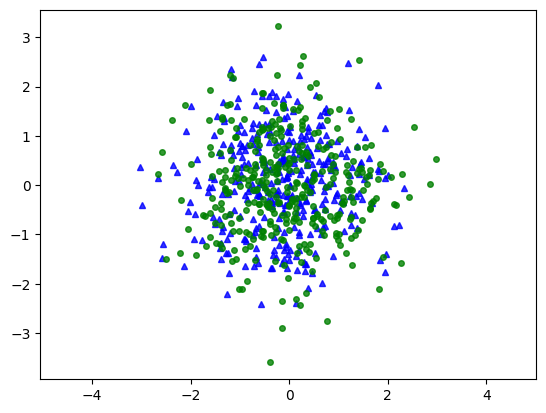

In [18]:
kmeans_display(X3, y3)

In [20]:
(centers, labels, it) = kmeans(X3, K=2)
centers[-1]

array([[-0.06315302,  0.06104957, -0.09959597,  0.05195529, -0.07650496,
        -0.06598553, -0.05184377, -0.03910761, -0.03104242,  0.07735549,
         0.02986646,  0.42718159, -0.52495481, -0.09426723,  1.02764059,
        -0.05491376, -0.0101068 , -1.03328257, -0.07123902, -0.03269559],
       [-0.11119075,  0.00118437, -0.05127334,  0.05181516,  0.03326312,
        -0.00695479, -0.06108689,  0.01646823, -0.04291798, -0.02797275,
        -0.0486566 , -0.39922744,  0.51631136, -0.09454363, -0.96527429,
         0.07507636,  0.04151158,  0.95769408,  0.04139662,  0.08867643]])